In [2]:
import numpy as np
import xarray as xr

import CAFE_tools2 as jcafe

In [20]:
%%time
ensemble_members = np.arange(5)
years = [str(i) for i in range(1979,2019)]
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
time = []

nino34_data = np.zeros((len(years)*len(months),len(ensemble_members)))
wholeP_data = np.zeros_like(nino34_data)

CPU times: user 4.35 ms, sys: 376 µs, total: 4.73 ms
Wall time: 4.52 ms


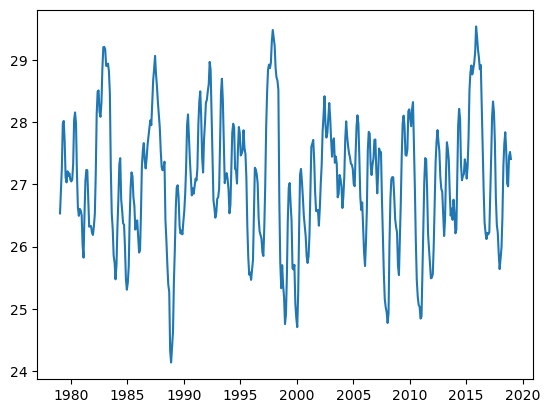

In [17]:
import matplotlib.pyplot as plt
plt.plot(time,nino34_data[:,0])

In [27]:
%%time
var = 'sosstsst'
time = []

box = jcafe.nino34_region
box[:2] = (box[:2]+180)%360-180
for emi,emint in enumerate(ensemble_members):
    em = 'opa'+str(emint)
    print(em)
    for yi, y in enumerate(years):
        if (yi%10) == 1:
            print(y)
        for mi, m in enumerate(months):
            file = ('/Users/jjeff122/Large_Datasets/ORAS5/'+
            'full_ensemble/oras5/ORCA025/'+var+'/'+em+'/'+var+'_ORAS5_1m_'+y+
                                      '/'+var+'_ORAS5_1m_'+y+m+'_grid_T_02.nc')
            data = xr.load_dataset(file)
            data_in_nino34 = data.where((data.nav_lat>=box[2]) &
                                        (data.nav_lat<=box[3]) &
                                        (data.nav_lon>=box[0]) &
                                        (data.nav_lon<=box[1]),drop=True)[var]
            nino34_data[yi*12+mi,emi] = data_in_nino34.mean(('x','y'))
            if emi == 0:
                time.append(data_in_nino34.time_counter)

opa0
1980
1990
2000
2010
opa1
1980
1990
2000
2010
opa2
1980
1990
2000
2010
opa3
1980
1990
2000
2010
opa4
1980
1990
2000
2010
CPU times: user 2min 25s, sys: 1min 25s, total: 3min 51s
Wall time: 5min 41s


In [28]:
assert np.all(nino34_data>5) #Check I haven't left any zeros

In [37]:
data.close()

In [47]:
%%time
var = 'so20chgt'
time = []

box = jcafe.full_pacific
box[:2] = (box[:2]+180)%360-180
for emi,emint in enumerate(ensemble_members):
    em = 'opa'+str(emint)
    print(em)
    for yi, y in enumerate(years):
        if (yi%10) == 1:
            print(y)
        for mi, m in enumerate(months):
            file = ('/Users/jjeff122/Large_Datasets/ORAS5/'+
            'full_ensemble/oras5/ORCA025/'+var+'/'+em+'/'+var+'_ORAS5_1m_'+y+
                                      '/'+var+'_ORAS5_1m_'+y+m+'_grid_T_02.nc')
            data = xr.load_dataset(file)
            data_in_wholeP = data.where((data.nav_lat>=box[2]) &
                                        (data.nav_lat<=box[3]) &
                                        ((data.nav_lon>=box[0]) | #Needs to be an or because -180/180 breaks down the pacific
                                        (data.nav_lon<=box[1])),drop=True)[var]
            wholeP_data[yi*12+mi,emi] = data_in_wholeP.mean(('x','y'))
            if emi == 0:
                time.append(data_in_wholeP.time_counter)

opa0
1980
1990
2000
2010
opa1
1980
1990
2000
2010
opa2
1980
1990
2000
2010
opa3
1980
1990
2000
2010
opa4
1980
1990
2000
2010
CPU times: user 2min 33s, sys: 1min 39s, total: 4min 12s
Wall time: 6min 20s


In [48]:
wholeP_data

array([[140.35092163, 139.7906189 , 140.91334534, 138.63331604,
        141.65663147],
       [138.20065308, 137.76144409, 138.97117615, 136.67948914,
        140.08613586],
       [130.05708313, 130.43429565, 130.00898743, 129.04016113,
        131.32592773],
       ...,
       [138.45146179, 138.5165863 , 138.63330078, 137.8924408 ,
        138.69941711],
       [139.42819214, 139.35081482, 139.5092926 , 139.01107788,
        139.34266663],
       [137.45106506, 136.94084167, 137.03536987, 136.65556335,
        137.05673218]])

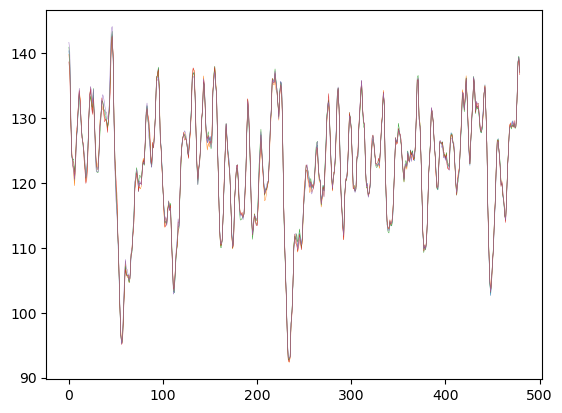

In [49]:
plt.plot(wholeP_data,linewidth=0.3)

In [59]:
np.array(time).flatten()

array(['1979-01-16T00:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-16T00:00:00.000000000', '1979-04-16T00:00:00.000000000',
       '1979-05-16T00:00:00.000000000', '1979-06-16T00:00:00.000000000',
       '1979-07-16T00:00:00.000000000', '1979-08-16T00:00:00.000000000',
       '1979-09-16T00:00:00.000000000', '1979-10-16T00:00:00.000000000',
       '1979-11-16T00:00:00.000000000', '1979-12-16T00:00:00.000000000',
       '1980-01-16T00:00:00.000000000', '1980-02-15T00:00:00.000000000',
       '1980-03-16T00:00:00.000000000', '1980-04-16T00:00:00.000000000',
       '1980-05-16T00:00:00.000000000', '1980-06-16T00:00:00.000000000',
       '1980-07-16T00:00:00.000000000', '1980-08-16T00:00:00.000000000',
       '1980-09-16T00:00:00.000000000', '1980-10-16T00:00:00.000000000',
       '1980-11-16T00:00:00.000000000', '1980-12-16T00:00:00.000000000',
       '1981-01-16T00:00:00.000000000', '1981-02-15T00:00:00.000000000',
       '1981-03-16T00:00:00.000000000', '1981-04-16

In [63]:
indices = xr.Dataset(data_vars={'nino34_sst':(('time','ensemble_member',),nino34_data),
                                'wholeP_i20':(('time','ensemble_member',),wholeP_data),
                               },
                     coords = {'time':(('time',),np.array(time).flatten()),
                               'ensemble_member':np.arange(5)})

In [65]:
indices

<xarray.Dataset>
Dimensions:          (time: 480, ensemble_member: 5)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-16 1979-02-15 ... 2018-12-16
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4
Data variables:
    nino34_sst       (time, ensemble_member) float64 26.53 26.56 ... 27.45 27.41
    wholeP_i20       (time, ensemble_member) float64 140.4 139.8 ... 136.7 137.1

In [64]:
import os

In [66]:
filename = 'ORAS5_saved_indices.nc'

assert not(os.path.isfile(filename)) #I don't want even the slightest chance of overwriting stuff :/
indices.to_netcdf(filename)

## Old full thing I'm not super sure where I got it from

In [49]:
sst = xr.open_mfdataset('/Users/jjeff122/Large_Datasets/ORAS5/sst/*.nc',concat_dim='time_counter', combine='nested')
sst

ImportError: cannot import name 'dumps_msgpack' from 'distributed.protocol.core' (/Applications/miniconda3/lib/python3.7/site-packages/distributed/protocol/core.py)

In [3]:
for time in sst.time_counter: #Slow because it's a for loop
    assert np.all(np.abs(sst.nav_lat.sel(time_counter = time) - sst.nav_lat.isel(time_counter=0))<10**-3)
    assert np.all(np.abs(sst.nav_lon.sel(time_counter = time) - sst.nav_lon.isel(time_counter=0))<10**-3)
print('passed')
sst['nav_lat'] = sst.nav_lat.isel(time_counter=0)
sst['nav_lon'] = sst.nav_lon.isel(time_counter=0)

passed


In [37]:
sst = sst.assign_coords({'nav_lon':sst.nav_lon%360})

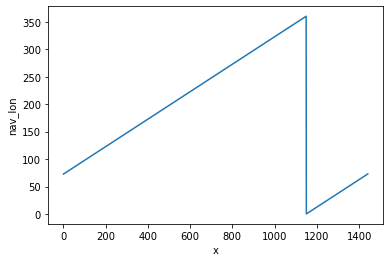

In [11]:
sst.nav_lon.isel(y=0).plot()

In [28]:
def calculate_anomaly_ORAS5(data,box,var_name):
    data_in_box = data.where((data.nav_lat>=box[2]) &
                           (data.nav_lat<=box[3]) &
                           (data.nav_lon>=box[0]) &
                           (data.nav_lon<=box[1]),drop=True)[var_name]
    #Forcing compute order to minimise floating point errors
    anomaly = (data_in_box-data_in_box.mean('time_counter')).compute() 
    return anomaly.mean(('x','y')).compute()

In [38]:
nino34 = calculate_anomaly_ORAS5(sst,jcafe.nino34_region,'sosstsst')
nino3 = calculate_anomaly_ORAS5(sst,jcafe.nino3_region,'sosstsst')

/Applications/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


### 20°C isotherm

In [30]:
i20 = xr.open_mfdataset('/Users/jjeff122/Large_Datasets/ORAS5/i20/*.nc',concat_dim='time_counter', combine='nested')
i20

<xarray.Dataset>
Dimensions:       (time_counter: 660, x: 1442, y: 1021)
Coordinates:
    nav_lat       (time_counter, y, x) float32 dask.array<chunksize=(1, 1021, 1442), meta=np.ndarray>
    nav_lon       (time_counter, y, x) float32 dask.array<chunksize=(1, 1021, 1442), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 1965-01-16 ... 2019-12-16T12:...
Dimensions without coordinates: x, y
Data variables:
    so20chgt      (time_counter, y, x) float32 dask.array<chunksize=(1, 1021, 1442), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean 2D fields
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...

In [8]:
for time in i20.time_counter: #Slow because it's a for loop
    assert np.all(np.abs(i20.nav_lat.sel(time_counter = time) - i20.nav_lat.isel(time_counter=0))<10**-3)
    assert np.all(np.abs(i20.nav_lon.sel(time_counter = time) - i20.nav_lon.isel(time_counter=0))<10**-3)
print('passed')

i20['nav_lat'] = i20.nav_lat.isel(time_counter=0)
i20['nav_lon'] = i20.nav_lon.isel(time_counter=0)

passed


In [39]:
i20 = i20.assign_coords({'nav_lon':i20.nav_lon%360})

In [40]:
wholeP = calculate_anomaly_ORAS5(i20,jcafe.full_pacific,'so20chgt')
westP = calculate_anomaly_ORAS5(i20,jcafe.west_pacific,'so20chgt')

/Applications/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Applications/miniconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(sl

In [32]:
sst.time_counter

<xarray.DataArray 'time_counter' (time_counter: 660)>
array(['1965-01-16T00:00:00.000000000', '1965-02-15T00:00:00.000000000',
       '1965-03-16T00:00:00.000000000', ..., '2019-10-16T12:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1965-01-16 ... 2019-12-16T12:...
Attributes:
    standard_name:  time

In [13]:
# indices = xr.Dataset(data_vars={'nino34_sst':(('time',),nino34),
#                                 'nino3_sst' :(('time',),nino3),
#                                 'wholeP_i20':(('time',),wholeP),
#                                 'westP_i20' :(('time',),westP)},
#                      coords = {'time':(('time',),sst.time_counter)})

In [41]:
indices = xr.Dataset(data_vars={'nino34_sst':(('ensemble_member','time'),nino34.expand_dims('ensemble_member')),
                                'nino3_sst' :(('ensemble_member','time'),nino3.expand_dims('ensemble_member')),
                                'wholeP_i20':(('ensemble_member','time'),wholeP.expand_dims('ensemble_member')),
                                'westP_i20' :(('ensemble_member','time'),westP.expand_dims('ensemble_member'))},
                     coords = {'time':(('time',),sst.time_counter),
                               'ensemble_member':np.array([0])})

In [42]:
indices

<xarray.Dataset>
Dimensions:          (ensemble_member: 1, time: 660)
Coordinates:
  * time             (time) datetime64[ns] 1965-01-16 ... 2019-12-16T12:00:00
  * ensemble_member  (ensemble_member) int64 0
Data variables:
    nino34_sst       (ensemble_member, time) float32 -1.038 -0.6096 ... 0.002669
    nino3_sst        (ensemble_member, time) float32 -1.032 0.04173 ... -0.4269
    wholeP_i20       (ensemble_member, time) float32 16.93 17.85 ... 5.549 7.358
    westP_i20        (ensemble_member, time) float32 16.37 12.09 ... 2.026 2.907

In [43]:
indices.to_netcdf('ORAS5_saved_indices.nc')

In [18]:
test = np.arange(4)

In [19]:
nino34

<xarray.DataArray 'sosstsst' (time_counter: 648)>
array([-1.0277382 , -0.5996225 ,  0.01201475,  0.6188283 ,  0.85416526,
        1.0094097 ,  0.82519674,  0.9057042 ,  0.8549476 ,  1.0642605 ,
        1.0476713 ,  0.9497132 ,  0.7929568 ,  0.65878844,  0.9710672 ,
        1.2692516 ,  0.92295134,  0.6601264 ,  0.306517  , -0.4420812 ,
       -0.62711024, -0.56049806, -0.858018  , -0.9167967 , -0.8967806 ,
       -0.7575995 , -0.29436716,  0.11766229,  0.42545366,  0.44452444,
       -0.05773664, -0.7320077 , -1.0128723 , -0.90092003, -0.7823427 ,
       -0.7958479 , -1.0288628 , -1.0489261 , -0.5750052 ,  0.17768233,
        0.29391316,  0.5460718 ,  0.29794616, -0.09404563, -0.20505756,
       -0.05043998,  0.18623233,  0.1941679 ,  0.34007943,  0.6029838 ,
        0.86889684,  1.0690119 ,  1.13729   ,  0.822522  ,  0.13597487,
        0.13918377,  0.08457009,  0.283497  ,  0.2864093 ,  0.20314251,
        0.16389126,  0.11078674,  0.42639014,  0.80945367,  0.6587725 ,
        0.14999825, -0.7969251 , -1.2828972 , -1.2912964 , -1.223211  ,
       -1.4492795 , -1.6198467 , -1.7103913 , -1.526834  , -1.0044222 ,
       -0.3301371 , -0.09027287, -0.18354712, -0.5387716 , -0.810782  ,
       -1.0180093 , -1.148133  , -1.3080013 , -1.3260518 , -1.0798959 ,
       -0.5523853 , -0.05618677,  0.85809547,  1.0248605 ,  1.1486726 ,
        0.9392429 ,  1.0577009 ,  0.99447525,  1.4169478 ,  1.5976139 ,
        1.6684135 ,  1.2987802 ,  0.9026041 ,  0.82044595,  0.7116237 ,
...
       -1.9660162 , -2.1566174 , -2.124991  , -1.4236006 , -0.80771685,
        0.05066805,  0.4230911 ,  0.39823672, -0.09550565, -0.79966396,
       -1.0465332 , -1.2607889 , -1.5096297 , -1.4979607 , -1.4422196 ,
       -0.9824389 , -0.34700698,  0.36147216,  0.68468875,  0.8724316 ,
        0.6890946 ,  0.5289778 ,  0.11975874, -0.07094488, -0.11723456,
       -0.48641956, -0.8294683 , -0.56390053,  0.15111752,  0.67771304,
        0.56901187,  0.3917066 , -0.12360644, -0.5024151 , -0.38880464,
       -0.5693756 , -0.24583484, -0.4491677 , -0.7864038 , -0.72803074,
        0.10762143,  0.9567645 ,  1.2138687 ,  1.0515981 ,  0.3167998 ,
        0.06721089,  0.13636217,  0.16565506,  0.4031789 ,  0.31493878,
        0.09356643,  0.29119337,  0.7397251 ,  1.5211513 ,  1.7984899 ,
        1.910942  ,  1.7683069 ,  1.8538849 ,  1.9537193 ,  2.1202946 ,
        2.5382416 ,  2.3729374 ,  2.1657195 ,  2.0416837 ,  1.8510481 ,
        1.9194919 ,  1.2761316 ,  0.63862616, -0.06380787, -0.6138636 ,
       -0.7737428 , -0.8787197 , -0.7803541 , -0.80190873, -0.7683556 ,
       -0.18967387,  0.4065102 ,  1.0899221 ,  1.3320862 ,  1.1576033 ,
        0.67183584, -0.21457091, -0.65019137, -0.7726251 , -1.1068053 ,
       -1.3614936 , -1.1920806 , -1.0058044 , -0.5264125 ,  0.2927633 ,
        0.64965713,  0.83818   ,  0.5559856 ,  0.01246516, -0.03089318,
        0.44691142,  0.5211223 ,  0.40772817], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1965-01-16 ... 2018-12-16

In [21]:
nino34.expand_dims('ensemble_member')

<xarray.DataArray 'sosstsst' (ensemble_member: 1, time_counter: 648)>
array([[-1.0277382 , -0.5996225 ,  0.01201475,  0.6188283 ,  0.85416526,
         1.0094097 ,  0.82519674,  0.9057042 ,  0.8549476 ,  1.0642605 ,
         1.0476713 ,  0.9497132 ,  0.7929568 ,  0.65878844,  0.9710672 ,
         1.2692516 ,  0.92295134,  0.6601264 ,  0.306517  , -0.4420812 ,
        -0.62711024, -0.56049806, -0.858018  , -0.9167967 , -0.8967806 ,
        -0.7575995 , -0.29436716,  0.11766229,  0.42545366,  0.44452444,
        -0.05773664, -0.7320077 , -1.0128723 , -0.90092003, -0.7823427 ,
        -0.7958479 , -1.0288628 , -1.0489261 , -0.5750052 ,  0.17768233,
         0.29391316,  0.5460718 ,  0.29794616, -0.09404563, -0.20505756,
        -0.05043998,  0.18623233,  0.1941679 ,  0.34007943,  0.6029838 ,
         0.86889684,  1.0690119 ,  1.13729   ,  0.822522  ,  0.13597487,
         0.13918377,  0.08457009,  0.283497  ,  0.2864093 ,  0.20314251,
         0.16389126,  0.11078674,  0.42639014,  0.80945367,  0.6587725 ,
         0.14999825, -0.7969251 , -1.2828972 , -1.2912964 , -1.223211  ,
        -1.4492795 , -1.6198467 , -1.7103913 , -1.526834  , -1.0044222 ,
        -0.3301371 , -0.09027287, -0.18354712, -0.5387716 , -0.810782  ,
        -1.0180093 , -1.148133  , -1.3080013 , -1.3260518 , -1.0798959 ,
        -0.5523853 , -0.05618677,  0.85809547,  1.0248605 ,  1.1486726 ,
         0.9392429 ,  1.0577009 ,  0.99447525,  1.4169478 ,  1.5976139 ,
         1.6684135 ,  1.2987802 ,  0.9026041 ,  0.82044595,  0.7116237 ,
...
        -1.9660162 , -2.1566174 , -2.124991  , -1.4236006 , -0.80771685,
         0.05066805,  0.4230911 ,  0.39823672, -0.09550565, -0.79966396,
        -1.0465332 , -1.2607889 , -1.5096297 , -1.4979607 , -1.4422196 ,
        -0.9824389 , -0.34700698,  0.36147216,  0.68468875,  0.8724316 ,
         0.6890946 ,  0.5289778 ,  0.11975874, -0.07094488, -0.11723456,
        -0.48641956, -0.8294683 , -0.56390053,  0.15111752,  0.67771304,
         0.56901187,  0.3917066 , -0.12360644, -0.5024151 , -0.38880464,
        -0.5693756 , -0.24583484, -0.4491677 , -0.7864038 , -0.72803074,
         0.10762143,  0.9567645 ,  1.2138687 ,  1.0515981 ,  0.3167998 ,
         0.06721089,  0.13636217,  0.16565506,  0.4031789 ,  0.31493878,
         0.09356643,  0.29119337,  0.7397251 ,  1.5211513 ,  1.7984899 ,
         1.910942  ,  1.7683069 ,  1.8538849 ,  1.9537193 ,  2.1202946 ,
         2.5382416 ,  2.3729374 ,  2.1657195 ,  2.0416837 ,  1.8510481 ,
         1.9194919 ,  1.2761316 ,  0.63862616, -0.06380787, -0.6138636 ,
        -0.7737428 , -0.8787197 , -0.7803541 , -0.80190873, -0.7683556 ,
        -0.18967387,  0.4065102 ,  1.0899221 ,  1.3320862 ,  1.1576033 ,
         0.67183584, -0.21457091, -0.65019137, -0.7726251 , -1.1068053 ,
        -1.3614936 , -1.1920806 , -1.0058044 , -0.5264125 ,  0.2927633 ,
         0.64965713,  0.83818   ,  0.5559856 ,  0.01246516, -0.03089318,
         0.44691142,  0.5211223 ,  0.40772817]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1965-01-16 ... 2018-12-16
Dimensions without coordinates: ensemble_member